<a href="https://colab.research.google.com/github/kfcav/Exploratory/blob/master/MentalHealthInTechSurveyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing the Mental Health in Tech Survey**



## **Initialize**

#### Data

[source](https://www.kaggle.com/osmi/mental-health-in-tech-survey)

**Content:**

* Timestamp
* Age
* Gender
* Country

* state: If you live in the United States, which state or territory do you live in?

* self_employed: Are you self-employed?

* family_history: Do you have a family history of mental illness?

* treatment: Have you sought treatment for a mental health condition?

* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

* no_employees: How many employees does your company or organization have?

* remote_work: Do you work remotely (outside of an office) at least 50% of the time?

* tech_company: Is your employer primarily a tech company/organization?

* benefits: Does your employer provide mental health benefits?

* care_options: Do you know the options for mental health care your employer provides?

* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

* leave: How easy is it for you to take medical leave for a mental health condition?

* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

* coworkers: Would you be willing to discuss a mental health issue with your coworkers?

* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

* mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

* comments: Any additional notes or comments


### Loading Dataset & Packages

In [2]:
# loading data into colab
from google.colab import files

uploaded = files.upload()

Saving survey.csv to survey.csv


In [3]:
# Start with loading all necessary libraries

#data packages
import numpy as np
import pandas as pd

#stats packages
import statsmodels.api as smf
from scipy import stats
from sklearn.metrics import (confusion_matrix, accuracy_score)

#natural language processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textwrap


#ploting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
#plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#configuration
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

#needed to view interactive plots in google colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
#DATA
survey = pd.read_csv('survey.csv')

## **Exploring Responses**

### Gender

In [5]:
#@title [code]

#clean up data
#gender
  #male
survey.Gender.replace(['male','M','m','Make','Male ','Man',
                       'Cis Male','something kinda male?',
                       'Male (CIS)','Mail', 'Guy (-ish) ^_^',
                       'ostensibly male, unsure what that really means',
                       'Malr','Mal', 'msle','Male-ish',
                      'Cis Man', 'Maile','male leaning androgynous', 
                       'cis male'],'Male', inplace=True)
  #female
survey.Gender.replace(['female','F', 'f', 'Female ', 
                       'Female (cis)', 'cis-female/femme', 
                       'woman', 'Femake', 'Cis Female',
                       'femail', 'Woman'],'Female', inplace=True)

  #nonbinary/genderqueer
nonbin = []
searchfor = ['Male','Female']
for i in survey.Gender:
 if i not in searchfor:
   survey.Gender.replace(str(i),'Non-binary/Genderqueer', inplace=True)
  

#configure plot  
configure_plotly_browser_state()
temp_series = survey['Gender'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender")

Notes:
- Most respondents are male

### Age

In [6]:
#@title [code]
#clean up ages
survey['Age'] = pd.to_numeric(survey['Age'])

#get rid of fake ages
not_real_age = survey[(survey['Age'] >= 100) | (survey['Age'] < 16)] #since 16 is the legal working age this is likely fabricated

for i in not_real_age['Age']:
  survey['Age'].replace([i], np.nan, inplace=True)

#Configure plot
configure_plotly_browser_state()
cnt_srs = survey['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='agsunset',
        showscale=True
    ),
)
layout = go.Layout(
    title='Age distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

#get a descriptive summary of age stats
ages = survey[survey['Age'] != np.nan]
print('Age Summary:')
print('---')
print(ages['Age'].describe())
print('---')
print('')
print('The mean age is ', ages['Age'].mean())
print('---')
print('The standard deviation of age is ', ages['Age'].std())
print('---')
print('The oldest repondent is ', ages['Age'].max())
print('---')
print('The youngest repondent is ', ages['Age'].min())
print('---')
print('The median repondent is ', ages['Age'].median())

Age Summary:
---
count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64
---

The mean age is  32.07673860911271
---
The standard deviation of age is  7.288271844190504
---
The oldest repondent is  72.0
---
The youngest repondent is  18.0
---
The median repondent is  31.0


Notes:
  - Most respondants about 30 or below
  - Ages may be fabricated to some degree but impossible to tell

In [7]:
#@title [code]
#interesting second look at Age
#Configure plot
configure_plotly_browser_state()

cnt_srs = survey['Age'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Distribution of Age'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age2")

print('Total Number of respondants:',len(survey.index))

Total Number of respondants: 1259


### Where are respondents from?

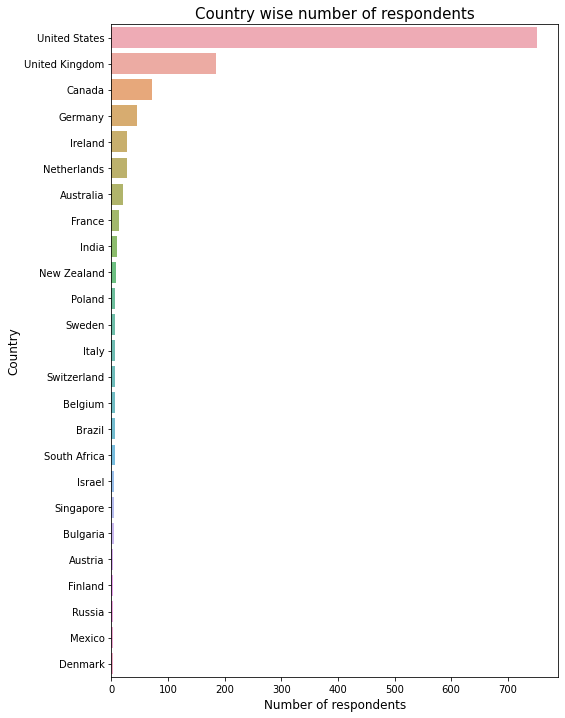

In [8]:
#@title [code]

#taking a look at where most respondents are from
cnt_srs = survey['Country'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

In [9]:
#@title [mapping]
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [10]:
#@title [code]

configure_plotly_browser_state()
loc_df = pd.read_csv("./location_map.csv")
new_df = pd.merge(survey[["Country","Age"]], loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df.groupby(["Country", "CODE"])["Age"].aggregate('count').reset_index()
new_df.columns = ["Country", "Code", "Count"]
#new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())

data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Count'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Count of respondents'),
      ) ]

layout = dict(
    title = 'Country wise number of respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

Notes:
  - 37% of respondents say that their job affects their mental health sometimes
  - 10% says often

### Who works in tech?

In [11]:
#@title [code]
#Who actually works in tech?
#configure plot
configure_plotly_browser_state()
temp_series = survey['tech_company'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Works in Tech'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Tech")

Notes:
  - Significant respondents not in tech. May need to show both results.

### Does work interfere with your mental health?

In [18]:
#@title [code]

#work interfere
#Configure plot
configure_plotly_browser_state()

cnt_srs = survey['work_interfere'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='If you have a mental health condition, do you feel that it interferes with your work?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="consequences")

print('Total Number of respondants:',len(survey.index))

Total Number of respondants: 1259


### Have you suffered mental health consquences?

In [19]:
#@title [code]

#have you suffered mental health consequences
#Configure plot
configure_plotly_browser_state()

cnt_srs = survey['mental_health_consequence'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Jet',
        showscale=True
    ),
)

layout = go.Layout(
    title='Do you think that discussing a mental health issue with your employer would have negative consequences?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="consequences")

In [14]:
#Configure plot
configure_plotly_browser_state()

cnt_srs = survey['wellness_program'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        showscale=False
    ),
)

layout = go.Layout(
    title='Does Your Company Have a Wellness Program?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="wellness")

In [15]:
survey.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## **Analysis**

### Correlations Matrix

                 -----------r**2 matrix---------
                       Age  self_employed  family_history  treatment  \
Age               1.000000       0.005556        0.000083   0.005421   
self_employed     0.005556       1.000000        0.000099   0.000424   
family_history    0.000083       0.000099        1.000000   0.142822   
treatment         0.005421       0.000424        0.142822   1.000000   
work_interfere    0.001941       0.004350        0.066926   0.223247   
remote_work       0.021581       0.102195        0.000209   0.000726   
tech_company      0.003373       0.006655        0.002123   0.000994   
wellness_program  0.014888       0.000037        0.002787   0.006877   
obs_consequence   0.005062       0.006712        0.015590   0.024640   

                  work_interfere  remote_work  tech_company  wellness_program  \
Age                     0.001941     0.021581      0.003373          0.014888   
self_employed           0.004350     0.102195      0.006655         

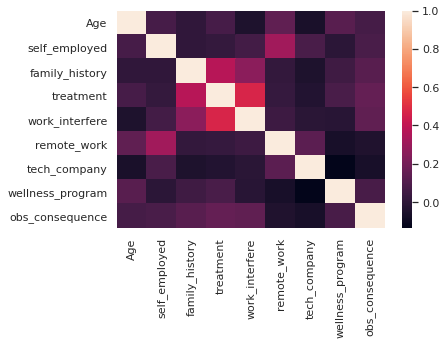

In [16]:
#@title [code]

#first create new df

df = survey.copy()
df.replace('Yes',1, inplace=True)
df.replace('No', 0, inplace=True)

#data prep
df.work_interfere.replace('Never', 0, inplace=True)
df.work_interfere.replace('Rarely', 1, inplace=True)
df.work_interfere.replace('Sometimes', 3, inplace=True)
df.work_interfere.replace('Often', 4, inplace=True)
df.wellness_program.replace("Don't know", 0, inplace=True)

#correlation matrix using seaborn
sns.set()
fig = plt.figure()

#generate a correlation table
matrix = df.corr('pearson')
#generate an r squared table
rsq = matrix**2
#generate a heatmap
sns.heatmap(matrix)
print('                 -----------r**2 matrix---------')
#print the r squared table
print(rsq)

### Logistic Regression

In [21]:
#@title [code]


#data prep
data = survey.copy()
data.replace('Yes',1, inplace=True)
data.replace('No', 0, inplace=True)

data.work_interfere.replace('Never', 0, inplace=True)
data.work_interfere.replace('Rarely', 1, inplace=True)
data.work_interfere.replace('Sometimes', 1, inplace=True)
data.work_interfere.replace('Often', 1, inplace=True)
data.wellness_program.replace("Don't know", 0, inplace=True)

data = data[['Age', 'remote_work', 'wellness_program', 'treatment','obs_consequence', 'work_interfere', 'tech_company']]
data = data.dropna()


# Training set

# only tech
#filter = data.tech_company != 0
#data = data[filter]

np.asarray(data)

Xtrain = data[['Age', 'remote_work', 'wellness_program', 'treatment','obs_consequence']]
ytrain = data[['work_interfere']]

model = smf.Logit(ytrain.astype(float),Xtrain.astype(float)).fit()

print('---------------------------------------------------')
print('')
# model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.368932
         Iterations 7
---------------------------------------------------



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         work_interfere   No. Observations:                  989
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.2901
Time:                        23:52:31   Log-Likelihood:                -364.87
converged:                       True   LL-Null:                       -513.96
Covariance Type:            nonrobust   LLR p-value:                 2.693e-63
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0087      0.004     -2.064      0.039      -0.017      -0.000
remote_work          0.4011      0.212      1.892      0.058      -0.014       0.817
wellness_program    -0.0195      0.249     -0.078      0.938      -0.507       0.468
treatment            3.0482      0.216     14.101      0.000       2.625       3.472
obs_consequence      0.8192      0.305      2.682      0.007       0.221       1.418
====================================================================================
"""

Notes:
- not a great model
- obs_consequence and treatment seem to be predictive

#### Lets look at Tech by itself

In [ ]:
#@title [code]

# Training set

data = data.copy()

#only tech
filter = data.tech_company != 0
data = data[filter]

np.asarray(data)

Xtrain = data[['Age', 'remote_work', 'wellness_program', 'treatment','obs_consequence']]
ytrain = data[['work_interfere']]

model = smf.Logit(ytrain,Xtrain.astype(float)).fit()

print('---------------------------------------------------')
print('')

# model summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.368387
         Iterations 7
---------------------------------------------------



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         work_interfere   No. Observations:                  815
Model:                          Logit   Df Residuals:                      810
Method:                           MLE   Df Model:                            4
Date:                Fri, 04 Dec 2020   Pseudo R-squ.:                  0.2982
Time:                        21:49:52   Log-Likelihood:                -300.24
converged:                       True   LL-Null:                       -427.78
Covariance Type:            nonrobust   LLR p-value:                 5.222e-54
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age               4.265e-11   6.04e-10      0.071      0.944   -1.14e-09    1.23e-09
remote_work          0.0317      0.190      0.167      0.868      -0.341       0.404
wellness_program    -0.2486      0.264     -0.943      0.346      -0.765       0.268
treatment            2.9694      0.229     12.979      0.000       2.521       3.418
obs_consequence      0.9677      0.342      2.834      0.005       0.298       1.637
====================================================================================
"""

## **Dealing With Comments**

We can create wordclouds and get senitment using Natural Langauge Processing [NLP]

There are 40044 words combined in all comments.


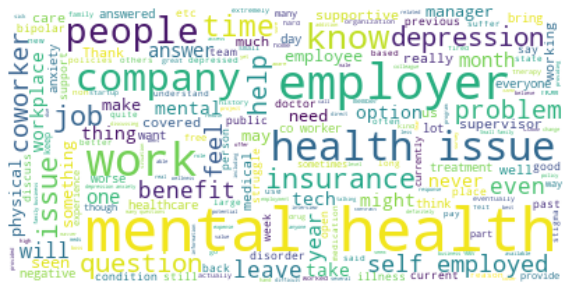

In [ ]:
#@title [code]


#Wordcloud of comments

# create a list of comments
comments = list(survey.comments.dropna())
all_comments = " ".join(comment for comment in comments)

print ("There are {} words combined in all comments.".format(len(all_comments)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["my", "on"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_comments)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis with NLP

#### **Visualize**

Total number of comments:  164
total comments processed: 114
Average of neutral scores:  0.8057543859649123
Average of positive scores:  0.09885087719298244
Average of negative scores:  0.09543859649122807
Average of compound scores:  0.0024061403508771947


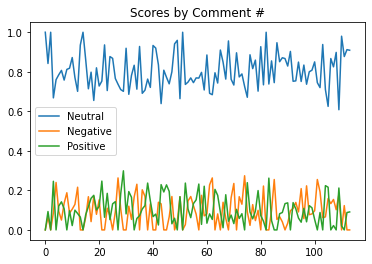

In [ ]:
#@title [code]


# Visualize comment sentiment

positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []

comment_count = 0
long_comments = 0

for comment in just_comments:
    comment_count = comment_count + 1
    comment_length = len(comment)

    if comment_length > 100:
        long_comments = long_comments + 1
        score = sia.polarity_scores(comment)
        compound_scores.append(score['compound'])
        negative_scores.append(score['neg'])
        neutral_scores.append(score['neu'])
        positive_scores.append(score['pos'])

print("Total number of comments: ", comment_count)
print("total comments processed:", long_comments)
print("Average of neutral scores: ", np.mean(neutral_scores))
print("Average of positive scores: ", np.mean(positive_scores))
print("Average of negative scores: ", np.mean(negative_scores))
print("Average of compound scores: ", np.mean(compound_scores))

plt.plot(neutral_scores, label="Neutral")
plt.plot(negative_scores, label="Negative")
plt.plot(positive_scores, label="Positive")
plt.title("Scores by Comment #")
plt.legend()
plt.show()

##### Sample Comments

In [ ]:
#@title [code]


# NLP Sentiment for comments
#downloading lexicon
nltk.download('vader_lexicon')

#comments data
just_comments = comments

#generate sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

comment_count = 0

for comment in just_comments:
    comment_count = comment_count + 1

    if comment_count > 75 and comment_count < 80:
        print("Comment text:")
        comment_parts=textwrap.wrap(comment, width = 50)

        for i in comment_parts:
            print(i)
        score = sia.polarity_scores(comment)

        for i in score:
            print(i, score[i])
        print()

print("Total number of comments: ", comment_count)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
Comment text:
Most employers / coworkers and even immediate
family is not all the time supportive to discuss
depression and other problems. ie. My wife thinks
she should be able to make sure that I am not
depressed  which is funny because sometimes
depression state has nothing to do with her.
neg 0.168
neu 0.664
pos 0.168
compound -0.2495

Comment text:
It has come to interfere with work as life
progresses.Between burn out and enduring more of
the work and balancing a family. Changes in my
mental health have a larger pond to make ripples
in.
neg 0.0
neu 1.0
pos 0.0
compound 0.0

Comment text:
The supposed divide between mental and physical
health needs to done away with and probably will
be as our knowledge of the brain increases. That
said we are often employed for our ability to
provide value. If any issue prevents is from
providing value that creates a very real challenge
for the employer who is responsible to
share

# **Summary**

### Regression

- It appears that seeking treatment for mental health conditions and having heard of or observed negative consequences for coworkers with mental health conditions in the workplace were the only two conditions that somewhat predicted whether people felt that work interfered with their mental health.
- Since being treated for a mental health condition can be summarized as having a mental health condition we may induce that experiencing or observing consequences for co-workers with mental health conditions is a characteristic of company culture
- Thus, company culture that does not support mental health conditions, will create consequences for those with mental health conditions
- in this regard, it is interesting that corporate wellness programs were not predictive of work interfering with mental health even with a minor correlation
- this may be a result of wellness programs not being as effective as they are intended to be


- Age was also predictive of work interfering which is not suprising as mental health tends to change with age

- remote work was also somewhat predictive however, we observed a negative correlation, which is interesting. I would expect that remote work would be better for mental health.


### Comments

- It appears that comments are distributed fairly evenly among positive and negative sentiment. 


## Takeaway

- It seems mental health is fairly common in tech. This may be a consequence of the age demographic as the [national institute of mental health shows](https://www.nimh.nih.gov/health/statistics/mental-illness.shtml) shows that mental health issues are most prevelant in the 18-25 and 26-49 age bucket.
- It also appears that there is a high prevelence of observed consequences of disclosing mental health issues. This is something that should be addressed. If the age demographic in tech is more likely than any other age demographic to have mental health issues, there should be more acknowledgement and preventitive measures than there likely is.
- Tech should aim to increase the prevelence of wellness programs, use data to inform those programs and improve effectiveness, and aim to remove mental health stigma and reduce the number of observed consequences
- Ultimately, it seems that improvements in the culture around mental health are needed.
